In [3]:
import pandas as pd
import numpy as np
import scipy.special
from scipy.optimize import minimize
import math

In [8]:
NUM_RESPONSES = 24

In [4]:
def log_likelihood(thetas, data):
    l_av = []
    
    l_a = np.prod([binom_likelihood_a_v(thetas[j], data[0][j]) for j in range(0, 5)])
    l_v = np.prod([binom_likelihood_a_v(thetas[j+5], data[1][j]) for j in range(0, 5)])

    for i in range(0, 5):
        for j in range(0, 5):
            l_av.append(binom_likelihood_av((thetas[i + 5], thetas[j]), data[i+2][j]))
            
    return -np.log(np.prod([l_a, l_v, np.prod(l_av)]))

$$s = \frac{e^\theta}{e^\theta + 1}$$

In [5]:
def softmax(theta):
    return (np.exp(theta) / (np.exp(theta) + 1))

$$\binom{N}{x} s^x  (1 - s)^{(N-x)}$$

In [6]:
def binom_likelihood_a_v(theta, x):
    return scipy.special.binom(NUM_RESPONSES, x) * softmax(theta)**x * (1 - softmax(theta))**(NUM_RESPONSES - x)

$$\binom{N}{x} p^x  (1 - p)^{(N-x)}$$

In [7]:
def binom_likelihood_av(thetas, x):
    return scipy.special.binom(NUM_RESPONSES, x) * p_av(thetas) ** x * (1 - p_av(thetas)) ** (NUM_RESPONSES - x) 

$$p = \frac{s(\theta_A) s(\theta_V)}{s(\theta_A) s(\theta_V) + (1 - s(\theta_A))(1 - s(\theta_V))}$$

In [8]:
def p_av(thetas):
    return (softmax(thetas[0]) * softmax(thetas[1])) / (softmax(thetas[0]) * softmax(thetas[1]) + 
        (1 - softmax(thetas[0])) * (1 - softmax(thetas[1])))

In [6]:
data = np.array([pd.read_csv("data/DataSub{}.txt".format(i), header = None, sep= "\s+") for i in range(1,6)], dtype=int)
data[0]

array([[ 0,  2,  4, 24, 24],
       [ 0, 17, 24, 24, 24],
       [ 0,  0,  0, 10, 14],
       [ 4,  8,  7, 20, 22],
       [ 9, 15, 19, 24, 24],
       [14, 17, 22, 24, 24],
       [14, 19, 23, 24, 24]])

In [10]:
s0 = minimize(log_likelihood, np.random.uniform(size=10), data[0])

In [11]:
(s0.x, s0.fun)

(array([-3.31249984, -2.29406402, -1.51871253,  2.45673704,  3.21447961,
        -2.97398178,  0.84074966,  2.90905781,  3.5835505 ,  3.82602048]),
 47.341626079778244)

In [12]:
s1 = minimize(log_likelihood, np.random.uniform(size=10), data[1])

In [13]:
(s1.x, s1.fun)

(array([-3.68435531, -1.83171133, -0.32485497,  2.57849203,  4.829168  ,
        -5.2910906 ,  0.91128169,  3.20199738,  5.08540099,  5.87272272]),
 32.98836229400522)

In [14]:
s2 = minimize(log_likelihood, np.random.uniform(size=10), data[2])

In [15]:
(s2.x, s2.fun)

(array([-2.64514226, -1.73949361, -0.68846137,  2.61508783,  5.40708289,
        -1.99842867,  0.25290933,  1.54162953,  2.36808207,  2.61909763]),
 53.381625302883755)

In [16]:
s3 = minimize(log_likelihood, np.random.uniform(size=10), data[3])

In [17]:
(s3.x, s3.fun)

(array([-4.11520081, -3.10551217, -2.04203934,  2.25480795,  4.62330709,
        -2.51613162, -1.19431655, -0.30726338,  1.25651197,  2.12220312]),
 46.90895921308356)

In [18]:
s4 = minimize(log_likelihood, np.random.uniform(size=10), data[4])

In [19]:
(s4.x, s4.fun)

(array([-5.43242822, -3.92658249, -1.41518824,  2.91516232,  6.2408824 ,
        -3.00499879,  0.42307472,  1.72985653,  2.4227969 ,  3.04850152]),
 42.81412495452377)

### Scatterplot

In [20]:
import matplotlib.pyplot as plt


In [21]:
def calculate_p_flmp(subject):
    ps = []
    for s in subject:
        p = list(softmax(s.x[0:5])) + list(softmax(s.x[5:10]))

        for i in range(0, 5):
            for j in range(0, 5):
                p.append(p_av((s.x[i + 5], s.x[j])))
        ps.append(p)
    return ps

In [22]:
ps = calculate_p_flmp([s0,s1,s2,s3,s4])

Text(0, 0.5, 'Proportions')

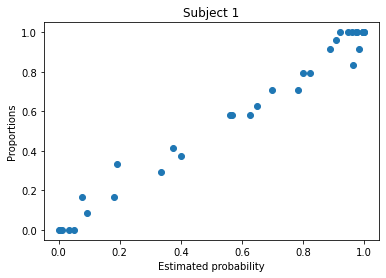

In [23]:
plt.figure()    
plt.scatter(ps[0], (data[0]/24).reshape((35,1)))
plt.title('Subject 1')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')

In [100]:
(np.corrcoef(ps[0], (data[0]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.983052014545914

Text(0, 0.5, 'Proportions')

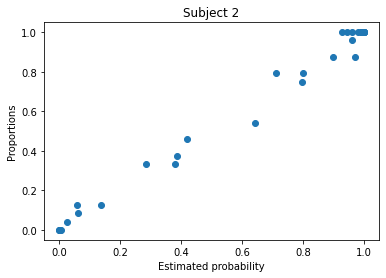

In [24]:
plt.figure()    
plt.scatter(ps[1], (data[1]/24).reshape((35,1)))
plt.title('Subject 2')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')

In [101]:
(np.corrcoef(ps[1], (data[1]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.9909637244632283

Text(0, 0.5, 'Proportions')

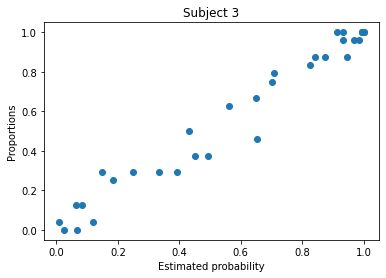

In [25]:
plt.figure()    
plt.scatter(ps[2], (data[2]/24).reshape((35,1)))
plt.title('Subject 3')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')

In [102]:
(np.corrcoef(ps[2], (data[2]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.9670660908411554

Text(0, 0.5, 'Proportions')

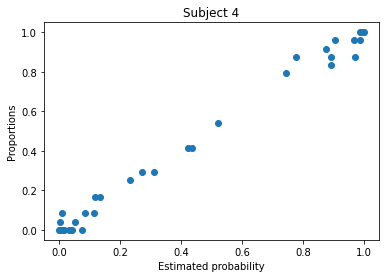

In [26]:
plt.figure()    
plt.scatter(ps[3], (data[3]/24).reshape((35,1)))
plt.title('Subject 4')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')

In [103]:
(np.corrcoef(ps[3], (data[3]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.9907212112711169

Text(0, 0.5, 'Proportions')

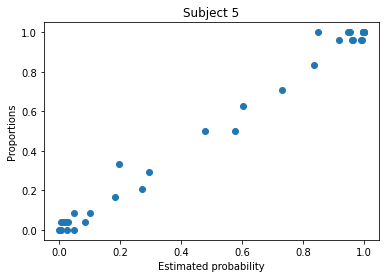

In [27]:
plt.figure()    
plt.scatter(ps[4], (data[4]/24).reshape((35,1)))
plt.title('Subject 5')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')

In [104]:
(np.corrcoef(ps[4], (data[4]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.9890422442668213

# PART 2

In [28]:
from scipy.stats import norm

In [29]:
def cdf_a_v(mu, sigma, c):
    return norm.cdf(mu, c, sigma)

def cdf_av(mu_a, mu_v, sigma_a, sigma_v, c_a, c_v):
    mu_av = (sigma_v ** 2 / (sigma_a ** 2 + sigma_v ** 2)) * (mu_a - c_a) + (sigma_a ** 2 / (sigma_a ** 2 + sigma_v ** 2)) * (mu_v - c_v)
    sigma_av = math.sqrt((sigma_a ** 2 * sigma_v ** 2) / (sigma_a ** 2 + sigma_v ** 2))
    return norm.cdf(mu_av/sigma_av)

In [30]:
def gauss_likelihood_a_v(mu, sigma, c, x):
    return scipy.special.binom(NUM_RESPONSES, x) * cdf_a_v(mu, sigma, c)**x * (1 - cdf_a_v(mu, sigma, c))**(NUM_RESPONSES - x)

def gauss_likelihood_av(mu_a, mu_v, sigma_a, sigma_v, c_a, c_v, x):
    return scipy.special.binom(NUM_RESPONSES, x) * cdf_av(mu_a, mu_v, sigma_a, sigma_v, c_a, c_v) ** x * (1 - cdf_av(mu_a, mu_v, sigma_a, sigma_v, c_a, c_v)) ** (NUM_RESPONSES - x)

In [31]:
def log_likelihood_gaussian(params, d):
    c_a, c_v, sigma_a, sigma_v = params
    sigma_a = np.exp(sigma_a)
    sigma_v = np.exp(sigma_v)
    l_av = []
    
    l_a = np.prod([gauss_likelihood_a_v(j + 1, sigma_a, c_a, d[0][j]) for j in range(0, 5)])
    l_v = np.prod([gauss_likelihood_a_v(j + 1, sigma_v, c_v, d[1][j]) for j in range(0, 5)])

    for i in range(0, 5):
        for j in range(0, 5):
            l_av.append(gauss_likelihood_av(j + 1, i + 1, sigma_a, sigma_v, c_a, c_v, d[i+2][j]))
            
    return -np.log(np.prod([l_a, l_v, np.prod(l_av)]))

In [32]:
s_mle_0 = minimize(log_likelihood_gaussian, np.random.uniform(size=4), data[0])
s_mle_0

/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/4229261807.py:14: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod([l_a, l_v, np.prod(l_av)]))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/4229261807.py:14: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod([l_a, l_v, np.prod(l_av)]))
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/4229261807.py:14: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod([l_a, l_v, np.prod(l_av)]))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpd

      fun: 72.80160664670242
 hess_inv: array([[ 0.01549901, -0.01079341,  0.00079718,  0.0003531 ],
       [-0.01079341,  0.01278183,  0.00031146, -0.00039515],
       [ 0.00079718,  0.00031146,  0.00402766,  0.00313545],
       [ 0.0003531 , -0.00039515,  0.00313545,  0.00347319]])
      jac: array([ 9.53674316e-07, -1.90734863e-06, -5.72204590e-06,  1.23977661e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 291
      nit: 18
     njev: 55
   status: 2
  success: False
        x: array([ 3.31169203,  1.85769064, -0.10208323, -0.1332647 ])

In [33]:
s_mle_1 = minimize(log_likelihood_gaussian, [1,1,1,1], data[1])
s_mle_1

/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/4229261807.py:14: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod([l_a, l_v, np.prod(l_av)]))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 55.07570757998339
 hess_inv: array([[ 0.01303968, -0.00610079,  0.00062148,  0.00046213],
       [-0.00610079,  0.00610178, -0.00041236, -0.00078123],
       [ 0.00062148, -0.00041236,  0.00537703,  0.00415273],
       [ 0.00046213, -0.00078123,  0.00415273,  0.00428977]])
      jac: array([9.53674316e-07, 2.86102295e-06, 2.86102295e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 115
      nit: 16
     njev: 23
   status: 0
  success: True
        x: array([ 3.02055526,  1.98442428, -0.2731591 , -0.5333263 ])

In [34]:
s_mle_2 = minimize(log_likelihood_gaussian, [1,1,1,1], data[2])
s_mle_2

      fun: 69.41370636322947
 hess_inv: array([[ 0.01013238, -0.00936045,  0.00021508, -0.00069269],
       [-0.00936045,  0.02079545, -0.00084683, -0.00190569],
       [ 0.00021508, -0.00084683,  0.00379089,  0.00338764],
       [-0.00069269, -0.00190569,  0.00338764,  0.00494109]])
      jac: array([ 5.72204590e-06,  6.67572021e-06, -9.53674316e-06, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 120
      nit: 18
     njev: 24
   status: 0
  success: True
        x: array([ 2.9025154 ,  2.0476345 , -0.09581157,  0.12568082])

In [35]:
s_mle_3 = minimize(log_likelihood_gaussian, [1,1,1,1], data[3])
s_mle_3

/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/4229261807.py:14: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod([l_a, l_v, np.prod(l_av)]))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/4229261807.py:14: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod([l_a, l_v, np.prod(l_av)]))


      fun: 67.21261014007078
 hess_inv: array([[ 5.29786278e-03, -6.89304512e-03,  2.53084250e-04,
         2.66516176e-04],
       [-6.89304512e-03,  2.25931705e-02,  4.75612926e-06,
        -7.55340225e-05],
       [ 2.53084250e-04,  4.75612926e-06,  3.52361467e-03,
         3.54101685e-03],
       [ 2.66516176e-04, -7.55340225e-05,  3.54101685e-03,
         6.31552658e-03]])
      jac: array([-9.53674316e-07, -9.53674316e-07, -9.53674316e-07, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 139
      nit: 20
     njev: 27
   status: 0
  success: True
        x: array([ 3.35798124,  3.10656047, -0.36319639,  0.12981738])

In [36]:
s_mle_4 = minimize(log_likelihood_gaussian, [1,1,1,1], data[4])
s_mle_4

/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/4229261807.py:14: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod([l_a, l_v, np.prod(l_av)]))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/4229261807.py:14: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod([l_a, l_v, np.prod(l_av)]))


      fun: 53.54646159431489
 hess_inv: array([[ 0.00504052, -0.00595967,  0.00017221, -0.00079148],
       [-0.00595967,  0.02065551, -0.00070672, -0.00191377],
       [ 0.00017221, -0.00070672,  0.00370752,  0.00381999],
       [-0.00079148, -0.00191377,  0.00381999,  0.00608759]])
      jac: array([-9.53674316e-07,  9.53674316e-07, -3.33786011e-06,  1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 124
      nit: 18
     njev: 24
   status: 0
  success: True
        x: array([ 3.32445194,  2.07178068, -0.5329072 , -0.07674362])

## Scatterplot

In [37]:
def calculate_p_mle(subject):
    ps_1 = []
    for s in subject:
        c_a, c_v, sigma_a, sigma_v = s.x
        sigma_a = np.exp(sigma_a)
        sigma_v = np.exp(sigma_v)
        p_1 = []
        for i in range(5):
            p_1.append(cdf_a_v(i + 1, sigma_a, c_a))

        for i in range(5):
            p_1.append(cdf_a_v(i + 1, sigma_v, c_v))

        for i in range(5):
            for j in range(0, 5):
                p_1.append(cdf_av(j + 1, i + 1, sigma_a, sigma_v, c_a, c_v))

        ps_1.append(p_1)
    return ps_1



In [38]:
ps_2 = calculate_p_mle([s_mle_0,s_mle_1,s_mle_2,s_mle_3,s_mle_4])

Text(0, 0.5, 'Proportions')

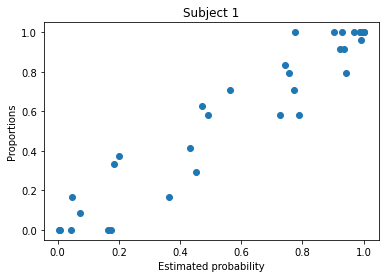

In [39]:
plt.figure()    
plt.scatter(ps_2[0], (data[0]/24).reshape((35,1)))
plt.title('Subject 1')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')

In [105]:
(np.corrcoef(ps_2[0], (data[0]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.9170260948975414

Text(0, 0.5, 'Proportions')

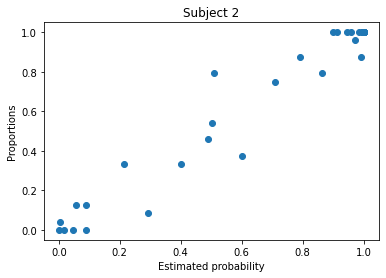

In [40]:
plt.figure()    
plt.scatter(ps_2[1], (data[1]/24).reshape((35,1)))
plt.title('Subject 2')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')

In [106]:
(np.corrcoef(ps_2[1], (data[1]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.9515155047548305

Text(0, 0.5, 'Proportions')

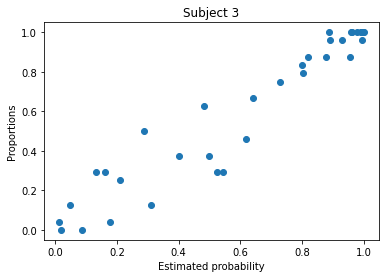

In [41]:
plt.figure()    
plt.scatter(ps_2[2], (data[2]/24).reshape((35,1)))
plt.title('Subject 3')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')

In [107]:
(np.corrcoef(ps_2[2], (data[2]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.9194533542883164

Text(0, 0.5, 'Proportions')

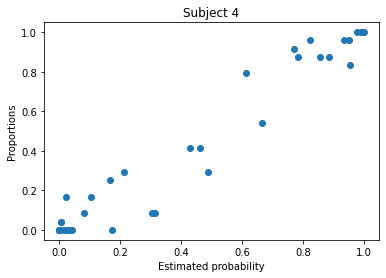

In [42]:
plt.figure()    
plt.scatter(ps_2[3], (data[3]/24).reshape((35,1)))
plt.title('Subject 4')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')

In [108]:
(np.corrcoef(ps_2[3], (data[3]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.9438552398959568

Text(0, 0.5, 'Proportions')

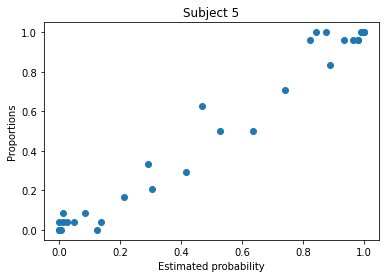

In [43]:
plt.figure()    
plt.scatter(ps_2[4], (data[4]/24).reshape((35,1)))
plt.title('Subject 5')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')

In [109]:
(np.corrcoef(ps_2[4], (data[4]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.9737125536166111

# Simulation

## FLMP

In [44]:
from scipy.stats import binom

In [45]:
def simulate_fmlp(thetas):
    m = np.array([[0] * 5] * 7)
    var = 0.3
    thetas_s = np.ones(10)

    for i in range(10):
            thetas_s[i] = thetas[i] + np.random.normal(0, var, 1)[0]

    m[0] = binom.rvs(NUM_RESPONSES, softmax(thetas_s[:5]))
    m[1] = binom.rvs(NUM_RESPONSES, softmax(thetas_s[5:]))

    for i in range(5):
        for j in range(5):
            m[i+2][j] = binom.rvs(NUM_RESPONSES, p_av((thetas_s[i + 5], thetas_s[j])))
    return m, thetas_s

In [46]:
simulated_flmp = []
simulated_flmp.append(simulate_fmlp(s0.x))
simulated_flmp.append(simulate_fmlp(s1.x))
simulated_flmp.append(simulate_fmlp(s2.x))
simulated_flmp.append(simulate_fmlp(s3.x))
simulated_flmp.append(simulate_fmlp(s4.x))

## MLE

In [47]:
def simulate_mle(params):
    c_a, c_v, sigma_a, sigma_v = params
    var = 0.3
    c_a = c_a + np.random.normal(0, var, 1)[0]
    c_v = c_v + np.random.normal(0, var, 1)[0]
    sigma_a = np.exp(sigma_a) + np.random.normal(0, var, 1)[0]
    sigma_v = np.exp(sigma_v) + np.random.normal(0, var, 1)[0]
    
    m = np.array([[0] * 5] * 7)
    
    m[0] = binom.rvs(NUM_RESPONSES, cdf_a_v(list(range(1,6)), sigma_a, c_a))
    m[1] = binom.rvs(NUM_RESPONSES, cdf_a_v(list(range(1,6)), sigma_v, c_v))

    for i in range(5):
        for j in range(5):
            m[i+2][j] =  binom.rvs(NUM_RESPONSES, cdf_av(j+1, i+1, sigma_a, sigma_v, c_a, c_v))
    return m, [c_a, c_v, sigma_a, sigma_v]

In [48]:
simulated_mle = []
simulated_mle.append(simulate_mle(s_mle_0.x))
simulated_mle.append(simulate_mle(s_mle_1.x))
simulated_mle.append(simulate_mle(s_mle_2.x))
simulated_mle.append(simulate_mle(s_mle_3.x))
simulated_mle.append(simulate_mle(s_mle_4.x))

In [49]:
simulated_mle

[(array([[ 1,  1,  2, 15, 22],
         [ 4, 14, 23, 24, 24],
         [ 0,  1,  3,  7, 11],
         [ 3,  4,  7, 15, 21],
         [ 3,  7, 13, 20, 22],
         [12, 14, 22, 24, 24],
         [19, 24, 23, 24, 24]]),
  [3.885937569195481,
   1.7888057218438358,
   0.9980811746300432,
   0.8991858834438758]),
 (array([[ 0,  2, 11, 23, 24],
         [ 0, 10, 22, 24, 24],
         [ 0,  0,  0, 11, 17],
         [ 0,  2, 12, 21, 24],
         [ 3, 10, 20, 24, 24],
         [14, 24, 24, 24, 24],
         [21, 24, 24, 24, 24]]),
  [2.8453661972781394,
   2.3108929541754457,
   0.5835731870831592,
   0.5536309476906698]),
 (array([[ 2,  8, 18, 22, 23],
         [ 2,  8, 16, 21, 23],
         [ 2,  2,  7,  9, 21],
         [ 5,  5, 15, 16, 23],
         [ 4, 13, 21, 20, 22],
         [ 8, 16, 16, 23, 24],
         [ 9, 21, 22, 24, 24]]),
  [2.5550249963580307,
   2.7603614889938957,
   1.0646621533973593,
   1.3409443999220163]),
 (array([[ 0,  2, 15, 24, 24],
         [ 1,  4, 11, 18, 22],


In [50]:
def conf_matrix():
    
    subj = 5
    log_flmp_flmp = []; log_flmp_mle = []; log_mle_flmp = []; log_mle_mle = [];
    
    MA = np.zeros((2,2))
    
    generated_flmp = []; generated_mle = []; parameters_flmp = []; parameters_mle = [];
    
    for i in range(subj):
        generated_flmp.append(simulated_flmp[i][0])
        generated_mle.append(simulated_mle[i][0])
        parameters_flmp.append(simulated_flmp[i][1])
        parameters_mle.append(simulated_mle[i][1])
        
    
    #first one is generated and second one is fitted
    for i in range(subj):
        log_flmp_flmp.append(log_likelihood(parameters_flmp[i], generated_flmp[i]))
        log_flmp_mle.append(log_likelihood_gaussian(parameters_mle[i], generated_flmp[i]))
        log_mle_mle.append(log_likelihood_gaussian(parameters_mle[i], generated_mle[i]))
        log_mle_flmp.append(log_likelihood(parameters_flmp[i], generated_mle[i]))
    
    for i in range(subj):
                             
        if log_flmp_flmp[i] < log_mle_flmp[i]:
            MA[0,0] += 1
        else:
            MA[0,1] += 1
                             
        if log_mle_mle[i] < log_flmp_mle[i]:
            MA[1,1] += 1
        else:
            MA[1,0] +=1
    
    return MA
        

In [51]:
MA = conf_matrix()
print(MA)

[[5. 0.]
 [0. 5.]]


In [52]:
for i in range(4):
    print(simulated_mle[0][1][i],simulated_mle[1][1][i],simulated_mle[2][1][i],simulated_mle[3][1][i],simulated_mle[4][1][i])

3.885937569195481 2.8453661972781394 2.5550249963580307 2.8124322835817686 3.3684859225686963
1.7888057218438358 2.3108929541754457 2.7603614889938957 3.24433497479597 2.3410895616149605
0.9980811746300432 0.5835731870831592 1.0646621533973593 0.5500832648311713 0.5438281819503105
0.8991858834438758 0.5536309476906698 1.3409443999220163 1.2465859704563644 0.8985475997413879


In [53]:
print(simulated_mle[0][0])

[[ 1  1  2 15 22]
 [ 4 14 23 24 24]
 [ 0  1  3  7 11]
 [ 3  4  7 15 21]
 [ 3  7 13 20 22]
 [12 14 22 24 24]
 [19 24 23 24 24]]


# Cross Validation

In [54]:
def log_likelihood_gaussian_2(params, d, test):
    c_a, c_v, sigma_a, sigma_v = params
    sigma_a = np.exp(sigma_a)
    sigma_v = np.exp(sigma_v)
    l_av = []
    
    l_a = [gauss_likelihood_a_v(j + 1, sigma_a, c_a, d[0][j]) for j in range(0, 5)]
    l_v = [gauss_likelihood_a_v(j + 1, sigma_v, c_v, d[1][j]) for j in range(0, 5)]

    for i in range(0, 5):
        for j in range(0, 5):
            l_av.append(gauss_likelihood_av(j + 1, i + 1, sigma_a, sigma_v, c_a, c_v, d[i+2][j]))
           
    l = l_a + l_v + l_av
    l[test] = 1
    return -np.log(np.prod(l))

In [55]:
def log_likelihood_2(thetas, data, test):
    l_av = []
    l_a = [binom_likelihood_a_v(thetas[j], data[0][j]) for j in range(0, 5)]
    l_v = [binom_likelihood_a_v(thetas[j+5], data[1][j]) for j in range(0, 5)]

    for i in range(0, 5):
        for j in range(0, 5):
            l_av.append(binom_likelihood_av((thetas[i + 5], thetas[j]), data[i+2][j]))
            
    l = l_a + l_v + l_av
    l[test] = 1
    return -np.log(np.prod(l))



In [56]:
def compute_binom_flme(thetas, data, test):
    l_av = []
    l_a = [binom_likelihood_a_v(thetas[j], data[0][j]) for j in range(0, 5)]
    l_v = [binom_likelihood_a_v(thetas[j+5], data[1][j]) for j in range(0, 5)]

    for i in range(0, 5):
        for j in range(0, 5):
            l_av.append(binom_likelihood_av((thetas[i + 5], thetas[j]), data[i+2][j]))
            
    l = l_a + l_v + l_av
    return -np.log(l[test])


In [57]:
def compute_binom_mle(params, d, test):
    c_a, c_v, sigma_a, sigma_v = params
    sigma_a = np.exp(sigma_a)
    sigma_v = np.exp(sigma_v)
    l_av = []
    
    l_a = [gauss_likelihood_a_v(j + 1, sigma_a, c_a, d[0][j]) for j in range(0, 5)]
    l_v = [gauss_likelihood_a_v(j + 1, sigma_v, c_v, d[1][j]) for j in range(0, 5)]

    for i in range(0, 5):
        for j in range(0, 5):
            l_av.append(gauss_likelihood_av(j + 1, i + 1, sigma_a, sigma_v, c_a, c_v, d[i+2][j]))
           
    l = l_a + l_v + l_av
    return -np.log(l[test])

In [58]:
p_4_flme = []

for s in range(5):
    test_err = []
    training_err = []
    p_4_flme_s = []
    for i in range(35):
        m = minimize(log_likelihood_2, np.random.uniform(size=10), args=(data[s], i))
        training_err.append(m.fun)
        test_err.append(compute_binom_flme(m.x, data[s], i))
        p_4_flme_s.append(calculate_p_flmp([m])[0][i])

    p_4_flme.append(p_4_flme_s)
    print("TRAINING ERR DATA", s , training_err)
    print("TEST ERR DATA", s, sum(test_err))

TRAINING ERR DATA 0 [46.4295819941554, 46.06475982402471, 45.77735520776974, 44.75628531036697, 46.235275249016695, 45.94801398398127, 45.59868853893916, 45.949244287378725, 46.64820755719901, 46.80047258352704, 47.29667186877589, 47.21586894567485, 47.06359193083908, 45.03367031024216, 45.35241536918942, 44.396572954354575, 43.07541694139506, 45.388639920077495, 40.54255303709019, 43.91956185199325, 45.47533630739982, 45.484875947524095, 45.70681775822951, 47.22768444495596, 47.2885746526724, 45.499116845157445, 44.872531198141154, 45.917887160792894, 47.28399108793606, 47.31471180944664, 45.294963950947476, 45.58244915843583, 45.795475700562484, 47.296473053919364, 47.320526456792315]
TEST ERR DATA 0 66.69455043425332


/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/1189811036.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/1189811036.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))


TRAINING ERR DATA 1 [31.86611407578094, 31.530921585608997, 30.985977985492735, 30.206616437822216, 32.779660429118245, 32.86203958429584, 30.68790798933097, 31.938705457239376, 32.83639549135921, 32.91967739941372, 32.9853228253077, 32.968856522539284, 32.89795101913769, 31.075290033719604, 30.87705821351027, 30.463227489984664, 30.904202894176606, 29.93701226951347, 26.747435253281164, 32.90861367965229, 30.78184781103187, 30.924043311092362, 31.460327726163364, 32.912926825337486, 32.980529473712956, 31.320045606635368, 32.00053107708952, 32.775520747939744, 32.977053872541155, 32.98717473986853, 30.87117306416728, 32.51938804616366, 32.892578884778146, 32.98322416667624, 32.987822051091534]
TEST ERR DATA 1 354.0282489911757
TRAINING ERR DATA 2 [51.59767067437534, 49.46760504207944, 51.49290461305743, 51.37666572550434, 53.26717798274754, 51.10365557248472, 51.24911780856675, 51.828300673816265, 50.97510879116956, 52.22699245308904, 51.6191517814154, 52.78403539216318, 51.0888058405

In [59]:
p_4_mle = []

for s in range(5):
    test_err = []
    training_err = []
    p_4_mle_s = []
    for i in range(35):
        m = minimize(log_likelihood_gaussian_2, [1,1,1,1], args=(data[s], i))
        training_err.append(m.fun)
        test_err.append(compute_binom_mle(m.x, data[s], i))
        p_4_mle_s.append(calculate_p_mle([m])[0][i])

    p_4_mle.append(p_4_mle_s)
    print("TRAINING ERR DATA", s , training_err)
    print("TEST ERR DATA", s, sum(test_err))

/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarnin

TRAINING ERR DATA 0 [72.67275121295951, 71.51651685932043, 68.26897620953055, 65.62759327238146, 71.99464604964565, 67.71157183881964, 69.65858381618176, 70.13581050819414, 72.62418767847075, 72.7976350236324, 72.64267068308395, 71.68854145499807, 67.8952698124371, 70.97741507881328, 69.50249781216988, 68.50862609067745, 69.35525590466222, 69.68707072159532, 70.61615170580174, 71.5327933009635, 68.6275064255455, 69.74963971526671, 71.09086501183583, 70.95836104739699, 72.48965495479882, 70.47641111016628, 70.77020004458575, 71.4679943782119, 72.52905419675695, 72.77478518137556, 67.51519682047353, 67.4499898512858, 71.06145554770012, 72.77891942376307, 72.80034879204007]
TEST ERR DATA 0 89.29676862879464


/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarnin

/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarnin

/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarnin

/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))


TRAINING ERR DATA 1 [52.388296171329266, 53.42365064246574, 53.18356486444795, 52.128803578871576, 54.96053848365707, 53.81051644436213, 47.98112082630674, 53.97683910863222, 55.06859344433971, 55.075704288863555, 55.03716818341717, 54.677400273850644, 52.6578057246576, 49.946555264461686, 49.39012734521535, 52.59669968833916, 52.21334019612891, 53.169513689095545, 52.97664294865464, 53.635166221160425, 53.0005740694188, 53.2779326590184, 52.754930641571256, 54.688812473783074, 55.03831993527572, 52.798151603214485, 54.02394329948256, 54.99235976341291, 55.070254138892054, 55.07551092368651, 45.6081746605032, 55.06189189014587, 55.075104481270195, 55.07569326806849, 55.075707397475746]
TEST ERR DATA 1 73.01057580807336


/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarnin

TRAINING ERR DATA 2 [68.95700495829759, 66.065951719728, 63.86425264641692, 66.22648032218606, 69.15247866891632, 65.79609288084983, 66.29982495387235, 67.75991050677342, 68.29794445481726, 66.9550916436508, 67.93207638594573, 67.06119285451597, 65.38120436690876, 67.60739714932114, 67.56494787528939, 66.75677173016909, 67.61462979056853, 64.82519090999965, 67.68804183875815, 68.43927046128638, 65.31011293623236, 67.5821954026311, 67.69788435489892, 68.23961247547003, 69.16757603685015, 64.71041180545937, 66.17599555037513, 67.98354342266487, 68.87201219454175, 69.36527060848766, 66.63691746777462, 67.77738844148624, 66.49468858841911, 69.28982351823048, 69.40643384028179]
TEST ERR DATA 2 80.73466451407046


/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarnin

/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarnin

/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarnin

TRAINING ERR DATA 3 [67.20421655309757, 66.56830165058346, 61.98186085074032, 63.87248421646444, 66.9870300938625, 66.35624511790013, 64.75629225961453, 65.2607459174279, 64.91122921782858, 62.44753305543592, 67.21123683106947, 64.71276023183142, 65.94714553485095, 65.38991645405912, 65.72228756912489, 67.2045068398311, 66.84346392930233, 62.40876475584542, 63.54282997372479, 66.08911706005757, 67.17320749875655, 66.11336905967745, 62.01632846041405, 63.9979397081591, 66.59201182981236, 65.10813055226883, 65.17455043814722, 63.353548786593706, 65.77186286702695, 67.02406025283393, 59.16592262487633, 64.9376339103853, 64.41104301061733, 66.21754103428688, 67.16466684318006]
TEST ERR DATA 3 79.6511151747029


/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarnin

/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarnin

/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.prod(l))
/Users/alejandro/src/github.com/alexrs/dtu-cognitive-modelling/bayes-homework/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/bq/3gyftpdn1jj45c_b7cpcjr200000gn/T/ipykernel_2765/2828207961.py:16: RuntimeWarnin

TRAINING ERR DATA 4 [53.54556386645142, 51.96147003403742, 51.643361741926796, 49.95322636387471, 53.49408733047097, 49.55339581223855, 49.87675069915557, 48.62959625106602, 52.26360116803368, 53.527482572776066, 53.545579874196626, 53.404595911996765, 51.12049218550219, 50.43671114105635, 52.557616034246074, 48.41548073249293, 52.4554451456176, 51.27809317337895, 50.30591356426392, 53.32620918496671, 53.4860920024153, 52.282073266848506, 51.6807754607618, 52.42732590610528, 53.50773038936421, 49.822025269876065, 51.80447813744295, 51.7367144677631, 52.278002741469905, 53.54138742980458, 52.549395516985776, 50.73179753221811, 51.5676903880382, 53.452214406514365, 53.545973988285304]
TEST ERR DATA 4 64.84448342311892


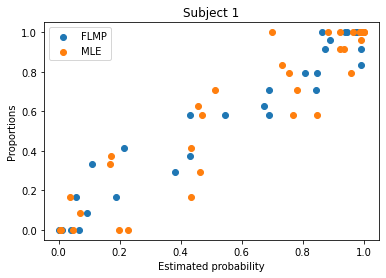

In [60]:
plt.figure()    
plt.scatter(p_4_flme[0], (data[0]/24).reshape((35,1)))
plt.scatter(p_4_mle[0], (data[0]/24).reshape((35,1)))
plt.title('Subject 1')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')
plt.legend(["FLMP", "MLE"])

In [89]:
(np.corrcoef(p_4_mle[0], (data[0]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.8737505742133839

In [90]:
(np.corrcoef(p_4_flme[0], (data[0]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.9515162356131063

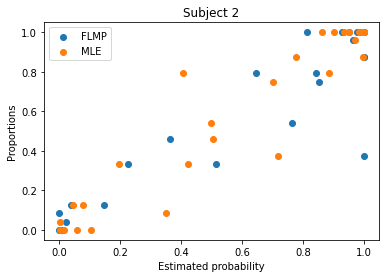

In [61]:
plt.figure()    
plt.scatter(p_4_flme[1], (data[1]/24).reshape((35,1)))
plt.scatter(p_4_mle[1], (data[1]/24).reshape((35,1)))
plt.title('Subject 2')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')
plt.legend(["FLMP", "MLE"])

In [91]:
(np.corrcoef(p_4_mle[1], (data[1]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.9151558607982938

In [93]:
(np.corrcoef(p_4_flme[1], (data[1]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.8937650181366554

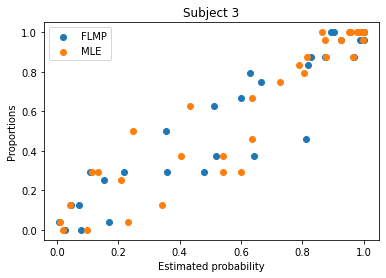

In [62]:
plt.figure()    
plt.scatter(p_4_flme[2], (data[2]/24).reshape((35,1)))
plt.scatter(p_4_mle[2], (data[2]/24).reshape((35,1)))
plt.title('Subject 3')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')
plt.legend(["FLMP", "MLE"])

In [94]:
(np.corrcoef(p_4_mle[2], (data[2]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.8850872700131527

In [95]:
(np.corrcoef(p_4_flme[2], (data[2]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.9048029945907663

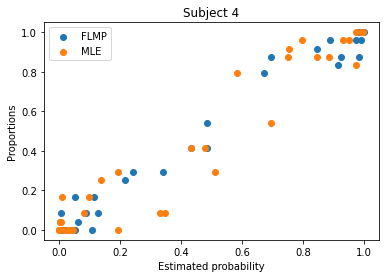

In [63]:
plt.figure()    
plt.scatter(p_4_flme[3], (data[3]/24).reshape((35,1)))
plt.scatter(p_4_mle[3], (data[3]/24).reshape((35,1)))
plt.title('Subject 4')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')
plt.legend(["FLMP", "MLE"])

In [96]:
(np.corrcoef(p_4_mle[3], (data[3]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.9251848911253155

In [97]:
(np.corrcoef(p_4_flme[3], (data[3]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.9763791576785812

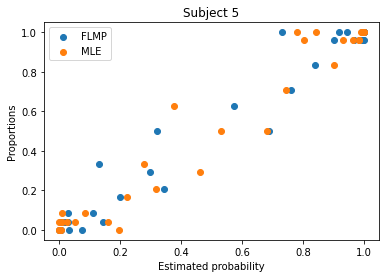

In [64]:
plt.figure()    
plt.scatter(p_4_flme[4], (data[4]/24).reshape((35,1)))
plt.scatter(p_4_mle[4], (data[4]/24).reshape((35,1)))
plt.title('Subject 5')
plt.xlabel('Estimated probability')
plt.ylabel('Proportions')
plt.legend(["FLMP", "MLE"])

In [98]:
(np.corrcoef(p_4_mle[4], (data[4]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.9517495334078667

In [99]:
(np.corrcoef(p_4_flme[4], (data[4]/24).reshape((35,1)).flatten().tolist())[0,1])**2

0.9615313329251682